In [2]:
import os
import matplotlib.pyplot as plt
import cPickle as pickle
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from src.modeling.conversion import ConversionClassifier, FEATURE_COLUMNS as CONV_FEATURES, LABEL_COLUMN as CONV_LABEL
from src.modeling.churn import ChurnClassifier, FEATURE_COLUMNS as CHURN_FEATURES, LABEL_COLUMN as CHURN_LABEL

conversion_model = open('../data/conversion_model.pkl')
churn_model = open('../data/churn_model.pkl')

conversion_clf = pickle.load(conversion_model)
churn_clf = pickle.load(churn_model)

In [4]:
conversion_X = conversion_clf.df[CONV_FEATURES].values
conversion_y = conversion_clf.df[CONV_LABEL].values
conversion_X_train, conversion_X_test, conversion_y_train, conversion_y_test = train_test_split(conversion_X, conversion_y)
conversion_y_predict = conversion_clf._clf.predict(conversion_X_test)

In [5]:
churn_X = churn_clf.df[CHURN_FEATURES].values
churn_y = churn_clf.df[CHURN_LABEL].values
churn_X_train, churn_X_test, churn_y_train, churn_y_test = train_test_split(churn_X, churn_y)
churn_y_predict = churn_clf.predict(churn_X_test)

In [6]:
churn_clf._load_training_dataset()
conversion_clf._load_training_dataset()

print "Churn Score: {}".format(churn_clf.score())
print "Conversion Score {}".format(conversion_clf.score())

Churn Score: 0.90990990991
Conversion Score 0.947257383966


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

print "Conversion Model Report"
conversion_y_pred = conversion_clf._clf.predict(conversion_X_test)
print("Confusion matrix:\n%s" % confusion_matrix(conversion_y_test, conversion_y_pred))
print classification_report(conversion_y_test, conversion_y_pred)

print "Churn Model Report"
churn_y_pred = churn_clf._clf.predict(churn_X_test)
print("Confusion matrix:\n%s" % confusion_matrix(churn_y_test, churn_y_pred))
print classification_report(churn_y_test, churn_y_pred)

Conversion Model Report
Confusion matrix:
[[466  36]
 [ 38 443]]
             precision    recall  f1-score   support

      False       0.92      0.93      0.93       502
       True       0.92      0.92      0.92       481

avg / total       0.92      0.92      0.92       983

Churn Model Report
Confusion matrix:
[[326  36]
 [ 21 409]]
             precision    recall  f1-score   support

      False       0.94      0.90      0.92       362
       True       0.92      0.95      0.93       430

avg / total       0.93      0.93      0.93       792



In [8]:
# print conversion_y_predict
import matplotlib.pyplot as plt

def plot_roc_curve(clf, X, y, title="Roc Curve", filename=None):
    scores = clf._clf.decision_function(X)
    fpr, tpr, thresholds  = roc_curve(y, scores)

    plt.figure()
    lw = 2
    print "ROC AUC: \t {}".format(roc_auc_score(y, scores))
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    if filename:
        plt.savefig(filename)
    plt.show()

ROC AUC: 	 0.978134044987


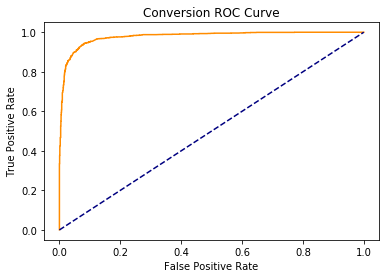

In [20]:
plot_roc_curve(conversion_clf, conversion_X_train, conversion_y_train, title='Conversion ROC Curve', filename="./img/conversion_roc_curve.png")

ROC AUC: 	 0.97044058688


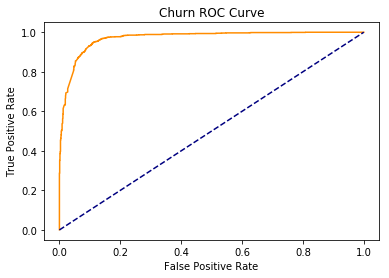

In [21]:
plot_roc_curve(churn_clf, churn_X_train, churn_y_train, title='Churn ROC Curve', filename="./img/churn_roc_curve.png")

In [11]:
import json
types = ['churn', 'conversion']
for model_type in types:
    fpath = '../data/{}_features.json'.format(model_type)

    features = open(fpath, 'r')
    d = json.load(features)
    top_features = sorted(zip(d.keys(), d.values()), key=lambda x: x[1], reverse=True)
    print "Top Features of {}".format(model_type)
    print '='*20
    
    for feature, importance in top_features:
        print "{:.2} \t {}".format(importance, feature)
        
    print
    print


Top Features of churn
0.22 	 signin_ratio
0.099 	 Editor Opened
0.061 	 Slide start
0.059 	 Export PPT
0.057 	 Export
0.048 	 Deck Created
0.042 	 View player page
0.034 	 Privacy
0.029 	 Ended Onboarding
0.027 	 Started Onboarding
0.025 	 Share
0.023 	 vertical_educator
0.02 	 Land on Pricing Page
0.019 	 vertical_marketing
0.018 	 Land on Education Page
0.017 	 App Became Active
0.017 	 vertical_student
0.017 	 Land on Zuru Page
0.013 	 Start
0.012 	 Set Privacy Public
0.012 	 New Deck
0.012 	 vertical_sales
0.011 	 Set Privacy Restricted
0.011 	 Land on Checkout Page
0.009 	 vertical_hr
0.0077 	 Display Limit Notification
0.0076 	 vertical_small_business_owner
0.0075 	 Land on Classroom Page
0.0074 	 vertical_other
0.0067 	 vertical_non-profit
0.0065 	 vertical_coach
0.0058 	 vertical_lawyer
0.0056 	 vertical_professional
0.0051 	 Export PPTX
0.0049 	 vertical_real_estate
0.004 	 Download PPTX
0.0036 	 vertical_health
0.0035 	 Display Welcome Countdown
0.0027 	 vertical_religious_or

In [12]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
a = 'Land on Pricing Page'
b = 'Editor Opened'
c = 'Display Limit Notification'
d = 'signin'
e = 'Export'

pricing_to_editor = [(CONV_FEATURES.index(a), CONV_FEATURES.index(b))]
pricing_to_limit = [(CONV_FEATURES.index(a), CONV_FEATURES.index(c))]
pricing_to_signin = [(CONV_FEATURES.index(a), CONV_FEATURES.index(d))]
pricing_to_export = [(CONV_FEATURES.index(a), CONV_FEATURES.index(e))]
signin_to_editor_opened = [(CONV_FEATURES.index(d), CONV_FEATURES.index(b))]
signin_to_limit = [(CONV_FEATURES.index(d), CONV_FEATURES.index(c))]

In [13]:
def conversion_ppd(features, xlim=None, ylim=None, filename=None):
    fig, axes = plot_partial_dependence(conversion_clf._clf, conversion_X, features, CONV_FEATURES, figsize=(14,9))
    if xlim:
        axes[0].set_xlim(xlim)
        
    if ylim:
        axes[0].set_ylim(ylim)
        
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

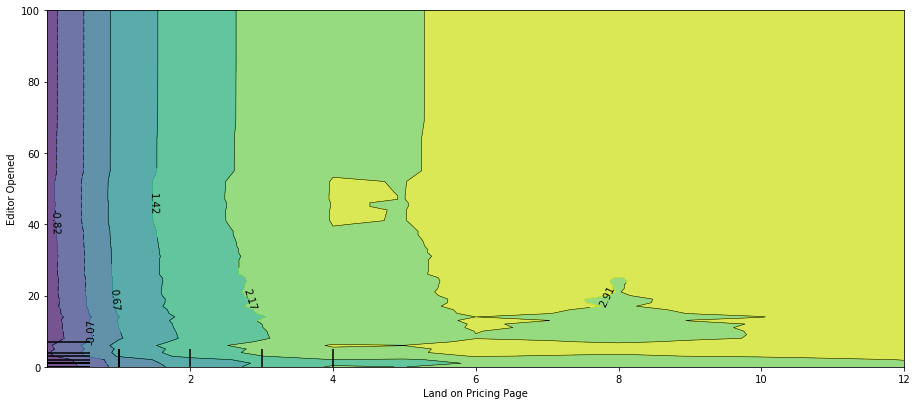

In [14]:
conversion_ppd(pricing_to_editor, xlim=(0,12), ylim=(0,100), filename='conversion_ppd_pricing_to_editor.png')

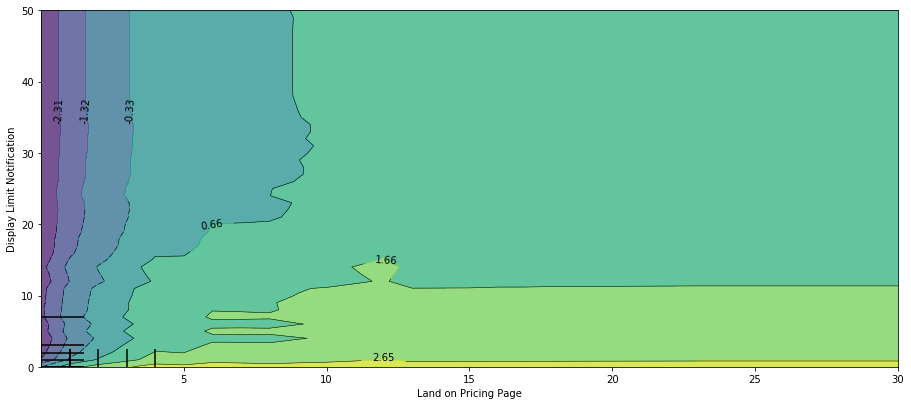

In [15]:
conversion_ppd(pricing_to_limit, xlim=(0,30), ylim=(0,50), filename='conversion_ppd_pricing_to_limit.png')

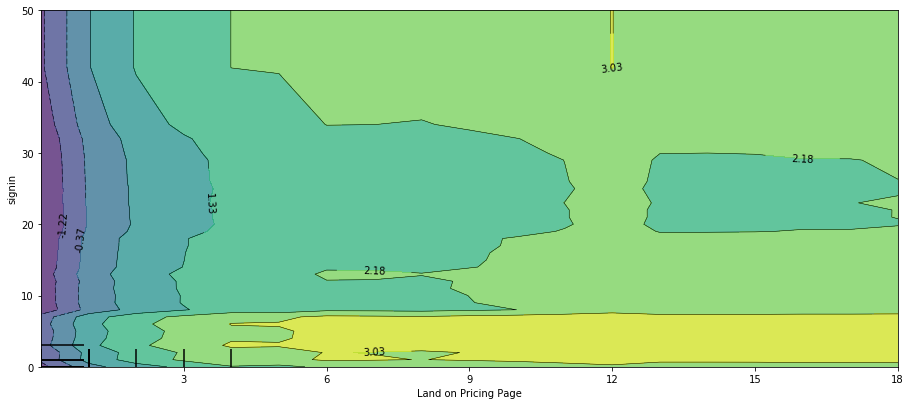

In [24]:
conversion_ppd(pricing_to_signin, xlim=(0,18), ylim=(0,50), filename='./img/conversion_ppd_pricing_to_sigin.png')

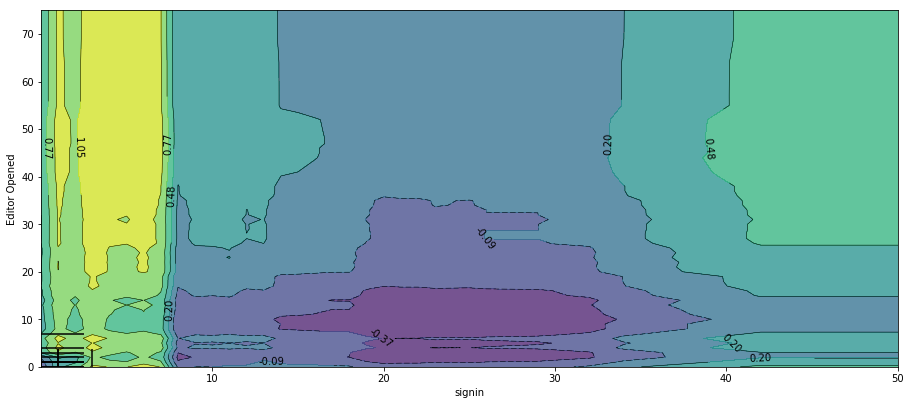

In [22]:
conversion_ppd(signin_to_editor_opened, xlim=(0,50), ylim=(0,75), filename='./img/conversion_ppd_sigin_to_editor.png')

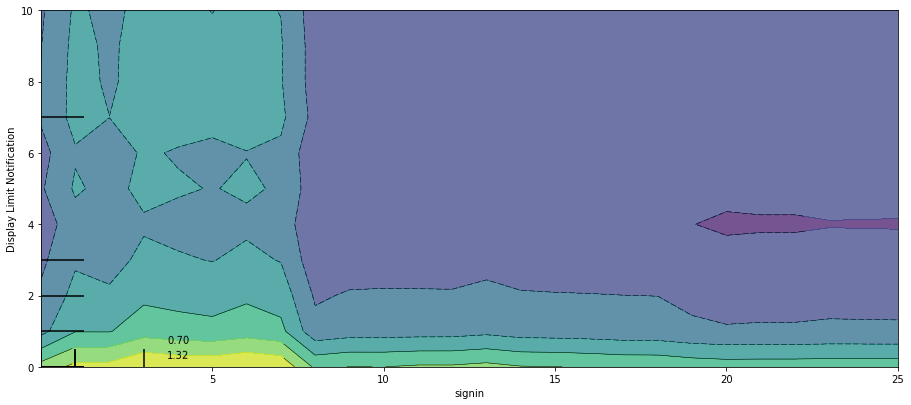

In [23]:
conversion_ppd(signin_to_limit, xlim=(0,25), ylim=(0,10), filename='./img/conversion_ppd_signin_to_limit.png')

In [ ]:
def churn_ppd(features, xlim=None, ylim=None, filename=None):
    fig, axes = plot_partial_dependence(churn_clf._clf, churn_X, features, CHURN_FEATURES, figsize=(14,9))
    if xlim:
        axes[0].set_xlim(xlim)
        
    if ylim:
        axes[0].set_ylim(ylim)
        
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

In [ ]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from itertools import combinations
# 0.46 	 account_age
# 0.1 	 camp_deliveries
# 0.06 	 Slide start
# 0.037 	 Editor Opened
# 0.035 	 signin
# 0.031 	 Deck Created
# 0.024 	 Ended Onboarding
# 0.024 	 Sign In
# 0.023 	 Started Onboarding
# 0.02 	 Export
# 0.02 	 Export PPT
# 0.018 	 vertical_educator

a = 'account_age'
b = 'camp_deliveries'
c = 'Slide start'
d = 'Editor Opened'
e = 'signin'
f = 'Deck Created'
g = 'Export'
h = 'Export PPT'
i = 'vertical_educator'

In [ ]:
for features in combinations([a,c,d,e,f,g,h], 2):
    churn_ppd([features])
    plt.show()

In [ ]:
fpath = '../data/conversion_features.json'.format(model_type)

features = open(fpath, 'r')
d = json.load(features)
top_features = sorted(zip(d.keys(), d.values()), key=lambda x: x[1], reverse=True)
top_features = [feature[0] for feature in top_features[:10]]
for f in top_features:
    plot_partial_dependence(conversion_clf._clf, conversion_X, [CONV_FEATURES.index(f)], CONV_FEATURES)

plt.show()

In [ ]:
fpath = '../data/churn_features.json'.format(model_type)

features = open(fpath, 'r')
d = json.load(features)
top_features = sorted(zip(d.keys(), d.values()), key=lambda x: x[1], reverse=True)
top_features = [feature[0] for feature in top_features[:10]]
for f in top_features:
    print f
    plot_partial_dependence(churn_clf._clf, churn_X, [CHURN_FEATURES.index(f)], CHURN_FEATURES, )

plt.show()

In [ ]:
churned = churn_clf.df[churn_clf.df['churned'] == True]
non_churned = churn_clf.df[churn_clf.df['churned'] == False]

In [ ]:
print churned['Editor Opened'].describe()
print non_churned['Editor Opened'].describe()